# Unsupervised Learning: Clustering & Dimensionality Reduction

**Author:** Ramin Yazdani

**Date:** December 2024

---

## Project Overview

This notebook demonstrates practical applications of unsupervised learning techniques, including:
- K-means clustering for pattern discovery
- Elbow method for optimal cluster selection
- Semi-supervised learning using clustering
- Principal Component Analysis (PCA) for dimensionality reduction


# Overview: Unsupervised Learning Techniques

# Introduction

This notebook demonstrates practical applications of clustering and dimensionality reduction techniques for machine learning workflows.

We explore two major areas:

1. **Part One**: Clustering techniques using K-means
2. **Part Two**: Dimensionality reduction using PCA

Both techniques are fundamental tools in unsupervised learning and data preprocessing.


# Part One: Clustering Analysis


In [1]:
## Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

random_state = 42

### Clustering the digits dataset

In this analysis, we work with the Digits dataset from scikit-learn, which consists of 8x8 pixel images of handwritten digits (0-9). 
Each datapoint is a 8x8 image of a digit.

    =================   ==============
    Classes                         10
    Samples per class             ~180
    Samples total                 1797
    Dimensionality                  64
    Features             integers 0-16
    =================   ==============

### Load the dataset

In [2]:
from sklearn.datasets import load_digits

# Load the Iris dataset
data = load_digits()

# Extract features (X) and target labels (y)
X = data.data
y = data.target  # True labels (for information only, not used later on)

### Visualize some sample digits

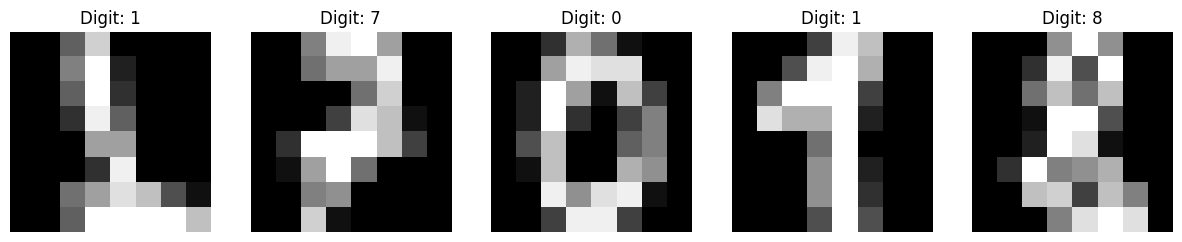

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    random_index = np.random.randint(
        0, len(X)
    )  # Choose a random index from the training set
    image = X[random_index].reshape(8, 8)  # Reshape the flat vector back to 8x8 image
    label = y[random_index]  # Get the corresponding label
    axes[i].imshow(image, cmap="gray")
    axes[i].set_title(f"Digit: {label}")
    axes[i].axis("off")

plt.show()

### Finding the optimal $k$ in the K-means cluster model

We will try using the elbow heuristic ($k \in [1,30]$) to determine the number of clusters in this dataset.

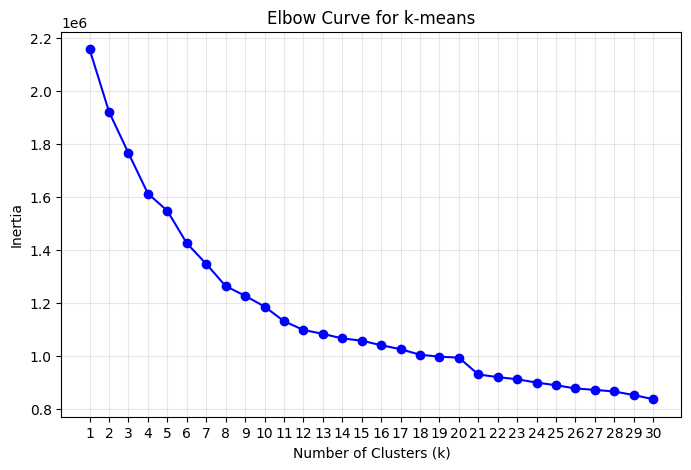

In [4]:
upper_bound_k = 30
inertia = []  # List to store inertia values for each k
# Calculate inertia for each number of clusters
for k in range(1, upper_bound_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Fit the model to the data
    inertia.append(kmeans.inertia_)  # Store the inertia

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, upper_bound_k + 1), inertia, marker="o", linestyle="-", color="b")
plt.title("Elbow Curve for k-means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, upper_bound_k + 1))
plt.grid(alpha=0.3)
plt.show()

### Analysis Questions

1. **Do clustering algorithms (like $k$-means) take into account the number of classes or the value of the labels in a dataset, or do they work independently of this information?**

2. **Looking at the elbow curve, what would be a reasonable choice for the number of clusters $k$? Justify your answer.**


### Clustering as a preprocessing step / semi-supervised learning

Clustering can also be used as a preprocessing step to help improve your classifier. For instance, in spatial data (e.g. data from GPS) it is possible to create new features by using the distance from the centroids. In this case, you use clustering to help with having limited data. We will work on the same Digits dataset from scikit-learn. 

    =================   ==============
    Classes                         10
    Samples per class             ~180
    Samples total                 1797
    Dimensionality                  64
    Features             integers 0-16
    =================   ==============

### Load the Digits Dataset

In [5]:
from sklearn.datasets import load_digits


X_digits, y_digits = load_digits(return_X_y=True)
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_digits, y_digits, test_size=0.7, random_state=random_state
)


### Train a LogisticRegression model on the whole dataset

In [6]:
initial_classifier = LogisticRegression(max_iter=10_000, random_state=random_state)
initial_classifier.fit(X_train, y_train)

print(
    f"Mean accuracy on the given test dataset:\n {initial_classifier.score(X_test, y_test)}"
)

Mean accuracy on the given test dataset:
 0.9475357710651828


### Training with Limited Labeled Data

In this step, we will first train a Logistic Regression classifier on a smaller labeled dataset (only 50 samples) to establish a baseline performance when labeled data is scarce.


In [7]:
n_labeled = 50
limited_classifier = LogisticRegression(max_iter=10_000)
# Fit the classifier using only the first n_labeled (50) data points
X_limited = X_train[:n_labeled]
y_limited = y_train[:n_labeled]
limited_classifier.fit(X_limited, y_limited)

print(
    f"Mean accuracy of the classifier using only {n_labeled} datapoints, on the given test dataset:\n {limited_classifier.score(X_test, y_test)}"
)

Mean accuracy of the classifier using only 50 datapoints, on the given test dataset:
 0.7965023847376789


### Training on Cluster Representatives

Now for the next experiment, we will use K-means clustering to group the unlabeled data. After clustering, we will obtain representative samples from each cluster (the cluster centroids or nearest samples) and use these as our training data.


In [8]:
from sklearn.cluster import KMeans

# Fit Kmeans to the data
k = 50  # Number of clusters to use
kmeans = KMeans(n_clusters=k, n_init=10, random_state=random_state)
kmeans.fit(X_train)

# compute the distance from each point to each cluster centroid
X_digits_distances = kmeans.transform(X_train)


representative_digit_idx =  np.argmin(X_digits_distances, axis=0)# TODO: # get the indices of the representative (closest) data points
# get the data points represented by those indices
X_representative_digits = X_train[representative_digit_idx]

# get the class labels of the representative data points
y_representative_digits = np.array(y_train[representative_digit_idx])  # TODO: # get the class labels of the representative data points

### Visualize the representative digit images (one per cluster)

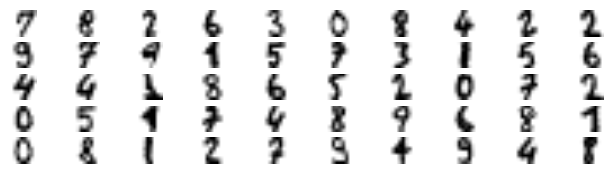

The labels of these representative digits are: 
 [7 8 2 6 3 0 8 4 2 2 9 7 9 1 5 7 3 1 5 6 4 4 1 8 6 5 2 0 7 2 0 5 1 7 4 8 9
 6 8 1 0 8 1 2 7 9 4 9 4 8]


In [9]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(
        X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear"
    )
    plt.axis("off")

plt.show()

print(f"The labels of these representative digits are: \n {y_representative_digits}")

### Train the model on the new representative dataset

In [10]:
cluster_log_reg = LogisticRegression(max_iter=10_000)
cluster_log_reg.fit(X_representative_digits, y_representative_digits)

print(
    f"Mean accuracy of the classifier using only {n_labeled} representative data points, on the given test dataset:\n {cluster_log_reg.score(X_test, y_test)}"
)

Mean accuracy of the classifier using only 50 representative data points, on the given test dataset:
 0.8783783783783784


### Using All Data Points with Cluster Labels

In this experiment, we extend the approach by using cluster assignments as automatic labels for all training data, not just the representatives. This allows us to leverage the entire dataset with cluster-derived labels.


In [11]:
# Create an empty array to hold the new "automatic" labels
y_train_automatic = np.empty(len(X_train), dtype=np.int64)  # TODO: size of array?

# Assign to the empty array the correct values.
# TODO: use kmeans.labels_ and the labels of the representative digits
for cluster_idx in range(k):  # Loop through each cluster
    # Find all data points belonging to this cluster
    cluster_points = (kmeans.labels_ == cluster_idx)

    # Assign the label of the representative point for this cluster
    y_train_automatic[cluster_points] = y_representative_digits[cluster_idx]

In [12]:
automatic_log_reg = LogisticRegression(max_iter=10_000)
automatic_log_reg.fit(X_train, y_train_automatic)

print(
    f"Accuracy using all data points: {initial_classifier.score(X_test, y_test):.4f}",
    f"\nAccuracy using the first 50 labelled data points: {limited_classifier.score(X_test, y_test):.4f}",
    f"\nAccuracy using the representative 50 data points: {cluster_log_reg.score(X_test, y_test):.4f}"
    f"\nAccuracy using all automatically labeled data points: {automatic_log_reg.score(X_test, y_test):.4f}",
)


Accuracy using all data points: 0.9475 
Accuracy using the first 50 labelled data points: 0.7965 
Accuracy using the representative 50 data points: 0.8784
Accuracy using all automatically labeled data points: 0.8967


# Part Two: Dimensionality Reduction with PCA

In the second part of this analysis, we apply Principal Component Analysis (PCA) for dimensionality reduction and evaluate its impact on classification performance. We explore the trade-off between reduced dimensionality and model accuracy.


In [13]:
# Reload the Digits dataset
data = load_digits()
X = data.data
y = data.target

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.125, random_state=42
)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### PCA with Logistic Regression

This function performs PCA for dimensionality reduction followed by logistic regression classification. It returns the test accuracy for a given number of principal components.


In [18]:

def evaluate_pca_accuracy(X_train, Y_train, X_val, Y_val, n_components_list):
    """Evaluate accuracy of Logistic Regression with different numbers of PCA components."""
    train_accuracies = []
    val_accuracies = []

    for n_components in n_components_list:
        #TODO: Apply PCA
        pca = PCA(n_components=n_components)  # TODO: Apply PCA
        X_train_pca = pca.fit_transform(X_train)  # TODO: Apply PCA to train
        X_val_pca = pca.transform(X_val)  # TODO: Apply PCA to val
        
        #TODO: Train Logistic Regression model
        clf = LogisticRegression(max_iter=10_000, random_state=42)  # TODO: Train Logistic Regression model
        clf.fit(X_train_pca, Y_train)

        
        train_pred = clf.predict(X_train_pca)  # TODO: predictions
        val_pred = clf.predict(X_val_pca)  # TODO: predictions


        train_accuracy = accuracy_score(Y_train, train_pred)  # TODO: Evaluate accuracy
        val_accuracy = accuracy_score(Y_val, val_pred)  # TODO: Evaluate accuracy

        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    return  train_accuracies, val_accuracies #TODO: accuracies for train and val

In [19]:
n_components_list = [2, 5, 10, 20, 30, 40, 50, 60]
train_accuracies, val_accuracies = evaluate_pca_accuracy(
    X_train, Y_train, X_val, Y_val, n_components_list
)


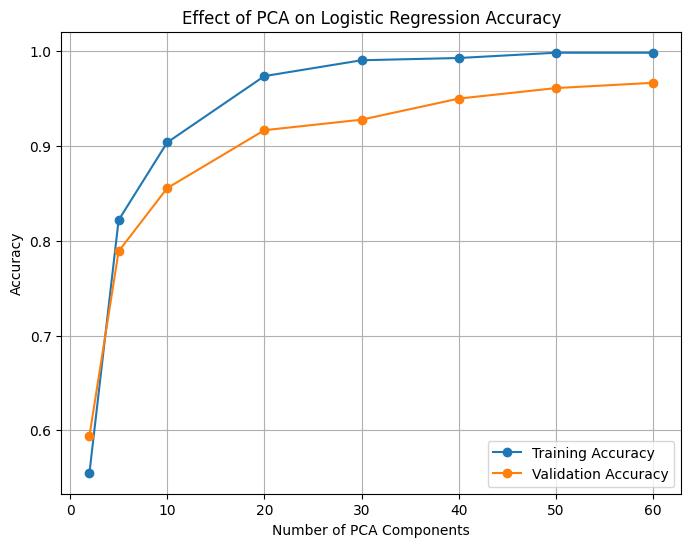

In [20]:
plt.figure(figsize=(8, 6))
# TODO:Plot the  training accuracies with marker = 'o'
plt.plot(n_components_list, train_accuracies, marker='o', label='Training Accuracy')

# TODO:Plot the  validation accuracies with marker = 'o'
plt.plot(n_components_list, val_accuracies, marker='o', label='Validation Accuracy')

plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.title("Effect of PCA on Logistic Regression Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Selecting Optimal PCA Components

Based on the plot above, select the optimal number of PCA components that balances dimensionality reduction with classification performance.
